# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

### What are the predictors and dependent variable ?

The predictors are gre, gpa, and rank.

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?
Attending a rank 1 school increases one's chances of getting admitted into UCLA.

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df_raw = pd.read_csv('../assets/admissions.csv')
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [3]:
df = df_raw.dropna()
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [4]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


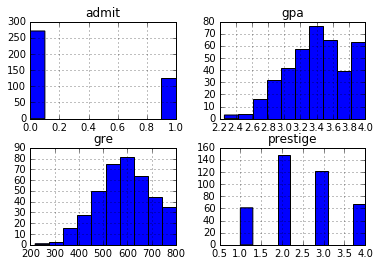

In [5]:
df.hist()
pl.show()

### FInd the correlation of each feature with admission

In [6]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


### How do you deal with the prestige feature?

In [21]:
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


In [7]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix = 'prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0           0.0           0.0           1.0           0.0
1           0.0           0.0           1.0           0.0
2           1.0           0.0           0.0           0.0
3           0.0           0.0           0.0           1.0
4           0.0           0.0           0.0           1.0


In [8]:
cols_to_keep = ['admit','gre','gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[: 'prestige_2.0':])
print data.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           0.0           1.0           0.0
1      1  660.0  3.67           0.0           0.0           1.0           0.0
2      1  800.0  4.00           1.0           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           0.0           1.0


In [9]:
data.corr()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
admit,1.000000,0.181202,0.174116,0.204689,0.067459,-0.122302,-0.133859
gre,0.181202,1.000000,0.382408,0.088277,0.058454,-0.074380,-0.069046
gpa,0.174116,0.382408,1.000000,0.068304,-0.050507,0.070881,-0.087671
prestige_1.0,0.204689,0.088277,0.068304,1.000000,-0.328493,-0.282120,-0.191989
prestige_2.0,0.067459,0.058454,-0.050507,-0.328493,1.000000,-0.510469,-0.347385
prestige_3.0,-0.122302,-0.074380,0.070881,-0.282120,-0.510469,1.000000,-0.298345
prestige_4.0,-0.133859,-0.069046,-0.087671,-0.191989,-0.347385,-0.298345,1.000000


In [10]:
data.describe()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,0.153652,0.372796,0.304786,0.168766
std,0.466044,115.717787,0.380208,0.361070,0.484159,0.460898,0.375017
min,0.000000,220.000000,2.260000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.130000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,580.000000,3.400000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,660.000000,3.670000,0.000000,1.000000,1.000000,0.000000
max,1.000000,800.000000,4.000000,1.000000,1.000000,1.000000,1.000000


### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

In [11]:
from sklearn import cross_validation
kf = cross_validation.KFold(len(data), n_folds = 5, shuffle = True)
y = data.admit

In [12]:
from sklearn import grid_search
from sklearn import linear_model, metrics
alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator = linear_model.Ridge(),
    param_grid = {'alpha': alphas},
    scoring = 'mean_squared_error')
gs.fit(data,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [13]:
print -gs.best_score_

7.6725784788e-25


In [14]:
print gs.best_estimator_

Ridge(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [ ]:
# How do you transition from grid search into creating a model?

In [32]:
lm = smf.ols(formula= 'admit ~ gre + prestige_1.0', data=data).fit()
print lm.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
#Why is the above an invalid syntax???

### What is the most important feature that contributes to the students probability of admission? 

GRE, GPA, and whether or not the students went to a ranked 1 school are important features that contributes to the student's probability of admission.

In [15]:
data.dtypes

admit             int64
gre             float64
gpa             float64
prestige_1.0    float64
prestige_2.0    float64
prestige_3.0    float64
prestige_4.0    float64
dtype: object

In [47]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           0.0           0.0
1      1  660.0  3.67           1.0           0.0           0.0
2      1  800.0  4.00           0.0           1.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           0.0


In [48]:
data['intercept'] = 1.0

In [49]:
train_cols = data.columns[1:]

In [50]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.597847
         Iterations 5


In [51]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 06 Sep 2016   Pseudo R-squ.:                 0.04326
Time:                        21:03:26   Log-Likelihood:                -237.35
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 0.0006619
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0025      0.001      2.379      0.017         0.000     0.005
gpa              0.7082      0.323      2.192      0.028         0.075     1.341
prestige_2.0     0.3664      0.320      1.14

In [52]:
print np.exp(result.params)

gre             1.002535
gpa             2.030291
prestige_2.0    1.442473
prestige_3.0    1.554588
prestige_4.0    1.090959
intercept       0.007223
dtype: float64


In [53]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
# Take the exponential of the coefficient to get the odds ratio
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000446  1.004629  1.002535
gpa           1.077936  3.824050  2.030291
prestige_2.0  0.770098  2.701901  1.442473
prestige_3.0  0.834597  2.895704  1.554588
prestige_4.0  0.573404  2.075661  1.090959
intercept     0.000850  0.061401  0.007223


### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model

In [39]:
def cartesian(arrays, out=None):
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [41]:
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]


In [42]:
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas

[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [43]:
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

In [44]:
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']

In [45]:
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2.0':])

In [54]:
combos['admit_pred'] = result.predict(combos[train_cols])

print combos.tail()
len(combos)

       gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
395  800.0  3.806667       4.0        1.0           0.0           0.0   
396  800.0  4.000000       1.0        1.0           0.0           0.0   
397  800.0  4.000000       2.0        1.0           1.0           0.0   
398  800.0  4.000000       3.0        1.0           0.0           1.0   
399  800.0  4.000000       4.0        1.0           0.0           0.0   

     prestige_4.0  admit_pred  
395           1.0    0.469553  
396           0.0    0.481988  
397           0.0    0.573043  
398           0.0    0.591249  
399           1.0    0.503744  


400

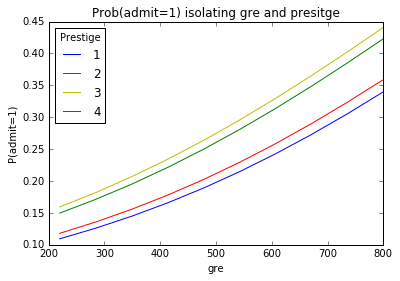

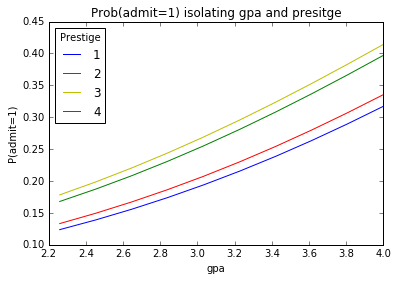

In [55]:
def isolate_and_plot(variable):
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()


isolate_and_plot('gre')
isolate_and_plot('gpa')

